Средний цвет центральной части круга: (168.9507966857871, 166.73371574251115, 166.65277246653918)


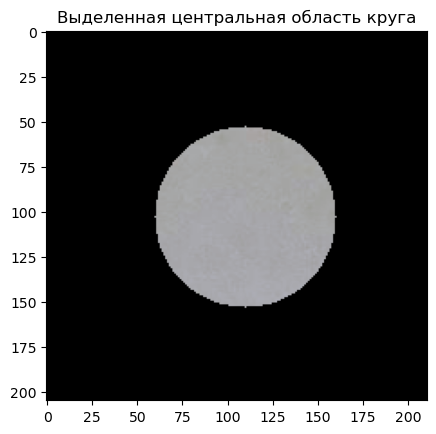

Оценочное значение pH: 7.5


In [1]:
import numpy as np
import cv2
from scipy.spatial import distance
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

def correct_white_balance(image):
    """Коррекция баланса белого по методу серого мира."""
    img_float = image.astype(np.float32)
    mean_r = np.mean(img_float[:,:,2])
    mean_g = np.mean(img_float[:,:,1])
    mean_b = np.mean(img_float[:,:,0])
    mean_gray = (mean_r + mean_g + mean_b) / 3
    img_float[:,:,2] *= (mean_gray / mean_r)
    img_float[:,:,1] *= (mean_gray / mean_g)
    img_float[:,:,0] *= (mean_gray / mean_b)
    np.clip(img_float, 0, 255, out=img_float)
    return img_float.astype(np.uint8)

# Загрузка изображения
image_path = 'image/6.0A.png' 
image = cv2.imread(image_path)
image_corrected = correct_white_balance(image)  # Применение коррекции баланса белого

# Преобразование в серый цвет и применение гауссова размытия
gray = cv2.cvtColor(image_corrected, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Обнаружение кругов
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=50, param2=30, minRadius=20, maxRadius=200)
mean_color = None
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        mask = np.zeros(gray.shape, dtype="uint8")
        cv2.circle(mask, (x, y), r // 2, 255, -1)  # Маска для центральной части круга
        mean_val = cv2.mean(image_corrected, mask=mask)[:3]  # Исключаем альфа-канал
        print("Средний цвет центральной части круга:", mean_val)
        masked_image = cv2.bitwise_and(image_corrected, image_corrected, mask=mask)
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.title('Выделенная центральная область круга')
        plt.show()
        mean_color = mean_val
else:
    print("Круги не обнаружены.")

# Данные образцов для pH и соответствующих цветов
test_samples = {
    (235.62231224680585, 222.9074478030539, 203.68712994702398): 8.0,
    (232.63816367005884, 217.0303020450629, 192.47394089150438): 7.7,
    (221.9598005609224, 220.86039264568402, 193.15674665004673): 7.5,
    (221.81386351074553, 226.03173261371396, 221.4759241798615): 7.2,
    (227.74166406980368, 234.09317544406358, 236.16266749766282): 6.9,
    (235.859, 232.477, 215.598): 6.5,
    (219.72342552482507, 235.1319560146618, 239.33288903698767): 6.3,
    (206.72048314677795, 233.9080503383292, 240.90166318851576): 6.0,
    (174.1411654721097, 233.8968526020567, 242.53568089747586): 5.7,
}

# Оценка pH
if mean_color is not None:
    points = np.array(list(test_samples.keys()))
    values = np.array(list(test_samples.values()))
    estimated_ph = griddata(points, values, [mean_color], method='nearest')[0]
    print("Оценочное значение pH:", estimated_ph)
else:
    print("Невозможно оценить pH: нет среднего цвета.")


In [2]:
def correct_white_balance(image):
    img_float = image.astype(np.float32)

    mean_r = np.mean(img_float[:,:,2])
    mean_g = np.mean(img_float[:,:,1])
    mean_b = np.mean(img_float[:,:,0])

    mean_gray = (mean_r + mean_g + mean_b) / 3

    img_float[:,:,2] = img_float[:,:,2] * (mean_gray / mean_r)
    img_float[:,:,1] = img_float[:,:,1] * (mean_gray / mean_g)
    img_float[:,:,0] = img_float[:,:,0] * (mean_gray / mean_b)

    np.clip(img_float, 0, 255, out=img_float)
    img_corrected = img_float.astype(np.uint8)

    return img_corrected

image_corrected = correct_white_balance(image)